#### Implement MLP Classifier on "Titanic Dataset". Fine tune the Hyperparameters. Display the Confusion Matrix and Classification Report.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../titanic_dataset/train.csv");
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
del df_train['PassengerId']
del df_train['Name']

In [6]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
del df_train['Cabin']

In [8]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Instead of deleting rows we'll replace null values with most common categories
df_train['Embarked'].loc[pd.isnull(df_train['Embarked'])] = 'S'

C:\Users\adity\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
# For Age we'll replace missing values with average age of the given dataset
mean_age_train = np.mean(df_train['Age'].loc[pd.isnull(df_train['Age']) == False].values)
df_train['Age'].loc[pd.isnull(df_train['Age'])] = mean_age_train

C:\Users\adity\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
mean_fare_train = np.mean(df_train['Fare'].loc[pd.isnull(df_train['Fare']) == False].values)

In [12]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
df_bkp = df_train.copy()

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation). 
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

Some implementations of machine learning algorithms require all data to be numerical. For example, scikit-learn has this requirement.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application

In [14]:
# Ordinal encoding is a way to convert a categorical variable into numbers by assigning each category a number. We’re going to use Scikit-Learn’s OrdinalEncoder to apply this transformation on variables Sex, Ticket, Embarked.
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df_train['Sex'] = oe.fit_transform(df_train['Sex'].values.reshape((-1, 1)))  # reshape to 2dim array
df_train['Ticket'] = oe.fit_transform(df_train['Ticket'].values.reshape((-1, 1)))
df_train['Embarked'] = oe.fit_transform(df_train['Embarked'].values.reshape((-1, 1)))

In [15]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.000000,1,0,523.0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,596.0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,669.0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,49.0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,101.0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,14.0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,675.0,23.4500,2.0
889,1,1,1.0,26.000000,0,0,8.0,30.0000,0.0


### Pclass

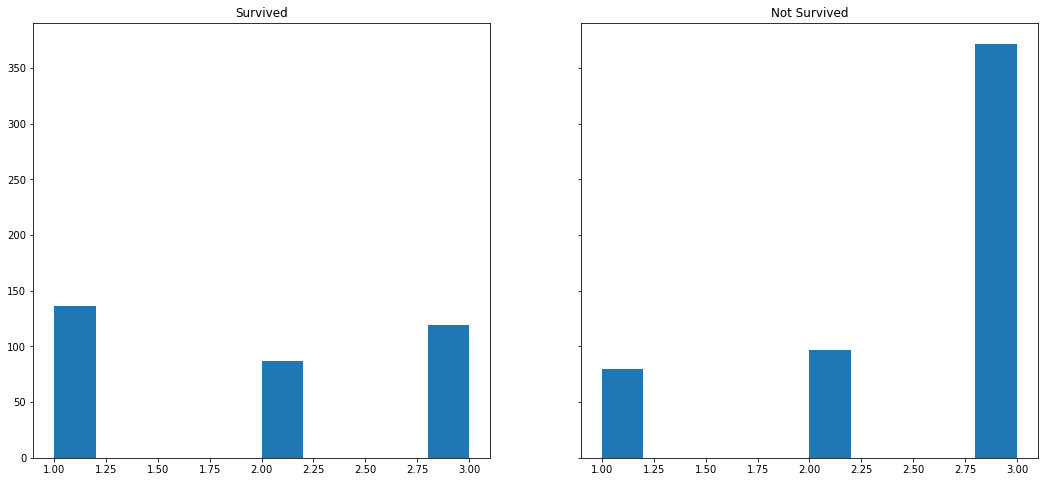

### Sex

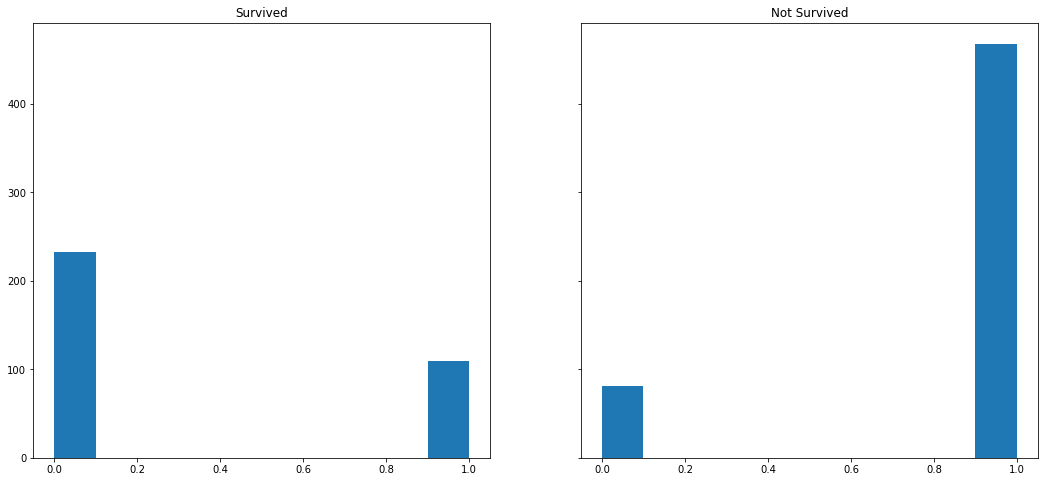

### Age

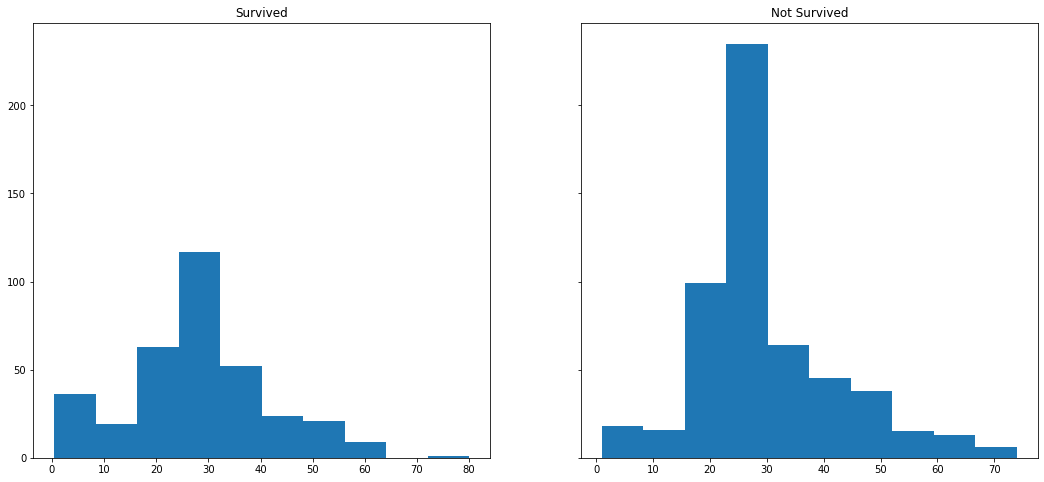

### SibSp

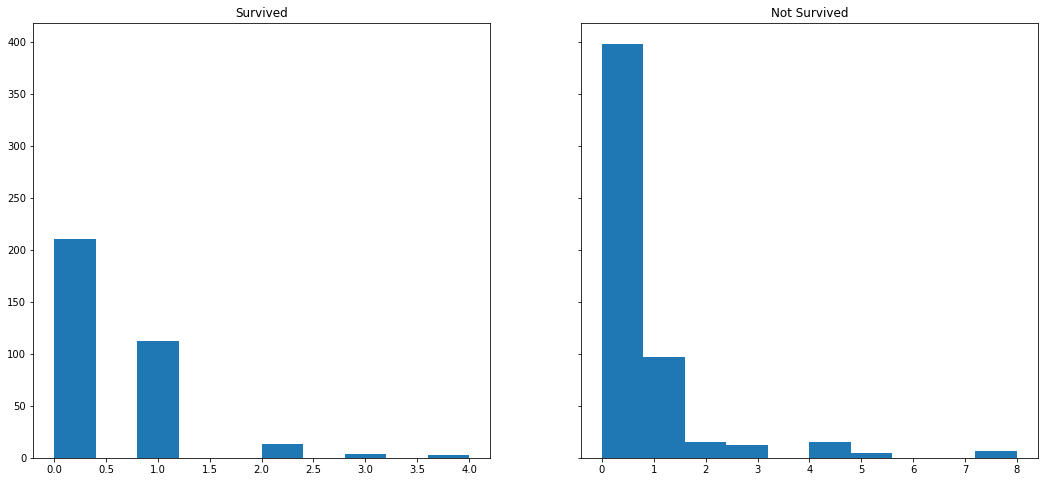

### Parch

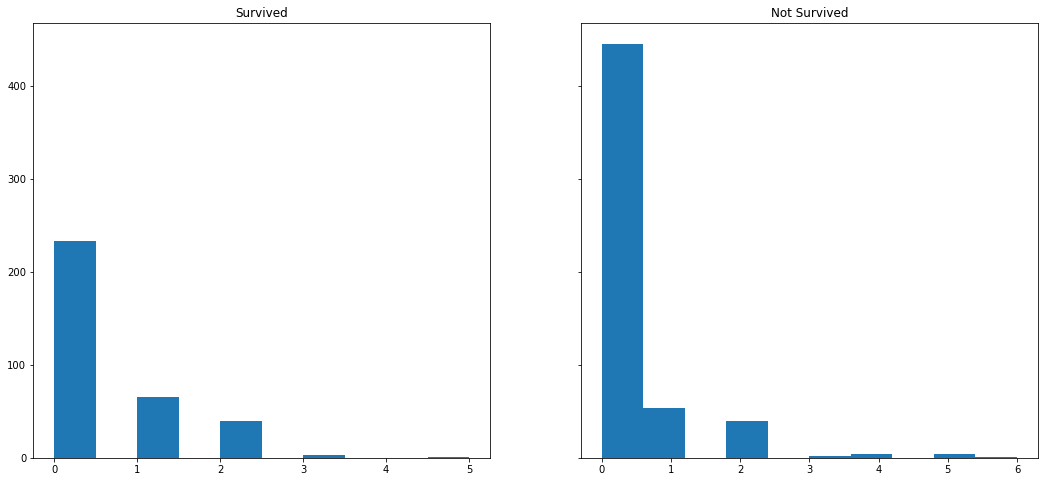

### Ticket

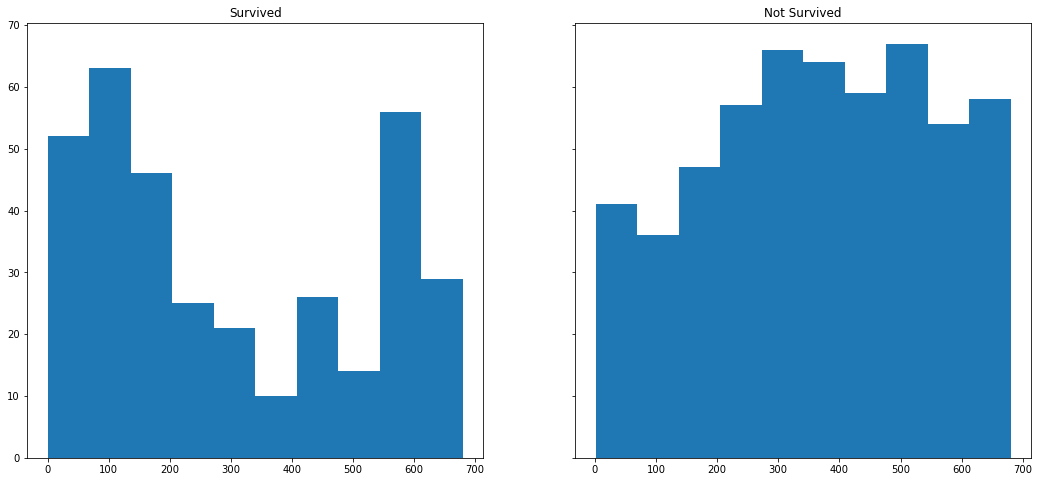

### Fare

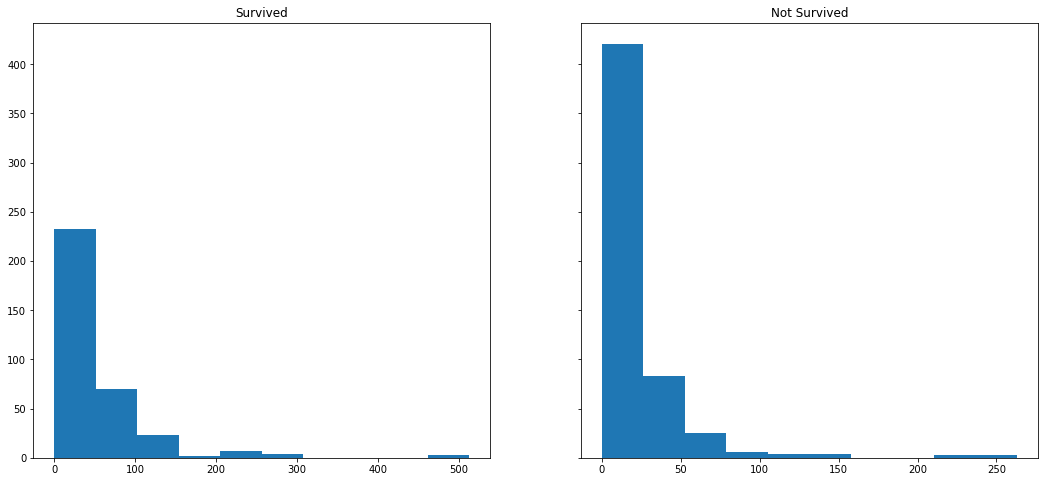

### Embarked

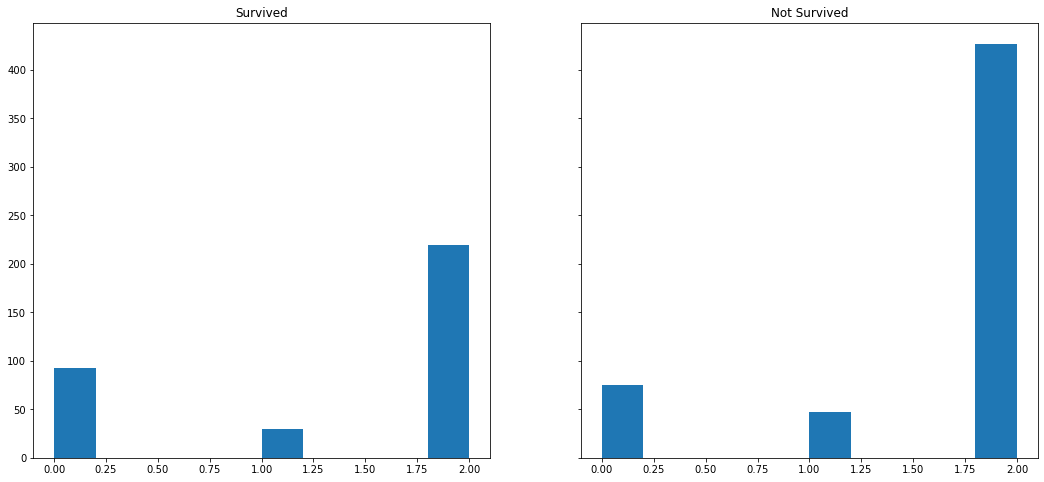

In [16]:
from IPython.display import display, Markdown
def show(txt):
    display(Markdown(txt))
for i in range(1, 9):
    show(f'### {df_train.columns[i]}')
    f, (survived, not_survived) = plt.subplots(1, 2, sharey=True, figsize=(18, 8))
    survived.hist(df_train.iloc[np.where(df_train['Survived'] == 1)[0], i])
    survived.set_title('Survived')
    not_survived.hist(df_train.iloc[np.where(df_train['Survived'] == 0)[0], i])
    not_survived.set_title('Not Survived')
    plt.show()

In [17]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,2.0


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [19]:
X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, 0].values

In [20]:
# Logistic Regression
lr = LogisticRegression()
lr_score = np.mean(cross_val_score(lr, X, y))
print(f'Logistic Regression: {lr_score}')


# Support Vector Machine
svc = SVC()
svc_score = np.mean(cross_val_score(svc, X, y))
print(f'Support Vector Machine: {svc_score}')


# Decision Tree
dtc = DecisionTreeClassifier()
dtc_score = np.mean(cross_val_score(dtc, X, y))
print(f'Decision Tree: {dtc_score}')


# K Nearest Neighbors
knc = KNeighborsClassifier()
knc_score = np.mean(cross_val_score(knc, X, y))
print(f'K Nearest Neighbors: {knc_score}')


# Multi-Layer Perceptron
mlpc = MLPClassifier()
mlpc_score = np.mean(cross_val_score(mlpc, X, y))
print(f'Multi-Layer Perceptron: {mlpc_score}')

C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression: 0.7957378695624883
Support Vector Machine: 0.6768062268533048
Decision Tree: 0.789008850668508
K Nearest Neighbors: 0.6869374176134581


C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron: 0.7554202498273805


In [21]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,2.0


In [22]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1.0,22.0,1,0,523.0,7.2500,2.0
1,1,0.0,38.0,1,0,596.0,71.2833,0.0
2,3,0.0,26.0,0,0,669.0,7.9250,2.0
3,1,0.0,35.0,1,0,49.0,53.1000,2.0
4,3,1.0,35.0,0,0,472.0,8.0500,2.0


In [23]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
# Standardizing X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

print(f'X Train: {X_train.shape}')
print(f'Y Train: {y_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'Y Test: {y_test.shape}')

X Train: (623, 8)
Y Train: (623,)
X Test: (268, 8)
Y Test: (268,)


1. hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.
2. max_iter: It denotes the number of epochs.
3. activation: The activation function for the hidden layers.
4. solver: This parameter specifies the algorithm for weight optimization across the nodes.
5. random_state: The parameter allows to set a seed for reproducing the same results

In [26]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [27]:
print(classifier.score(X_test, y_test))

0.8022388059701493


In [28]:
print(classifier.score(X_train, y_train))

0.9020866773675762


In [29]:
X_test

array([[ 0.82737724,  0.73769513,  0.        , ..., -0.74489475,
        -0.34145224, -1.9423032 ],
       [-0.36936484,  0.73769513,  0.10010856, ...,  1.03852519,
        -0.43700744,  0.58595414],
       [ 0.82737724,  0.73769513, -0.7463893 , ...,  1.53668718,
        -0.48885426,  0.58595414],
       ...,
       [-1.56610693,  0.73769513,  2.71655648, ..., -1.32276267,
        -0.11384571,  0.58595414],
       [ 0.82737724,  0.73769513, -0.97725235, ..., -0.38621812,
        -0.47400493,  0.58595414],
       [-1.56610693,  0.73769513, -0.1307545 , ..., -1.67147606,
        -0.11384571,  0.58595414]])

In [30]:
y_pred = classifier.predict(X_test)

print(y_pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[142  15]
 [ 38  73]]


In [32]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.83      0.66      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



In [33]:
# Feature Engineering
# backup - before ordinal encoding
df = df_bkp.copy()

In [34]:
# Now lets try OneHot Encoding - for categorical values
from sklearn.preprocessing import OneHotEncoder

# Pclass
pclass_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
pclass_transf.fit(df['Pclass'].values.reshape((-1, 1)))
pclass = pclass_transf.transform(df['Pclass'].values.reshape((-1, 1)))
df['Pclass0'] = pclass[:, 0]
df['Pclass1'] = pclass[:, 1]
df['Pclass2'] = pclass[:, 2]
del df['Pclass']

# Sex
gender_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
gender_transf.fit(df['Sex'].values.reshape((-1, 1)))
gender = gender_transf.transform(df['Sex'].values.reshape((-1, 1)))
df['Male'] = gender[:, 0]
df['Female'] = gender[:, 1]
del df['Sex']

# Ticket
ticket_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
ticket_transf.fit(df['Ticket'].values.reshape((-1, 1)))
ticket = ticket_transf.transform(df['Ticket'].values.reshape((-1, 1)))
for i in range(ticket.shape[1]):
    df[f'Ticket{i}'] = ticket[:, i]
del df['Ticket']

# Embarked
embarked_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
embarked_transf.fit(df['Embarked'].values.reshape((-1, 1)))
embarked = embarked_transf.transform(df['Embarked'].values.reshape((-1, 1)))
for i in range(embarked.shape[1]):
    df[f'Embarked{i}'] = embarked[:, i]
del df['Embarked']

In [35]:
df.shape

(891, 694)

In [36]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

age_transf = MinMaxScaler().fit(df['Age'].values.reshape(-1, 1))
df['Age'] = age_transf.transform(df['Age'].values.reshape(-1, 1))

sibsp_transf = MinMaxScaler().fit(df['SibSp'].values.reshape(-1, 1))
df['SibSp'] = sibsp_transf.transform(df['SibSp'].values.reshape(-1, 1))

parch_transf = MinMaxScaler().fit(df['Parch'].values.reshape(-1, 1))
df['Parch'] = parch_transf.transform(df['Parch'].values.reshape(-1, 1))

fare_transf = MinMaxScaler().fit(df['Fare'].values.reshape(-1, 1))
df['Fare'] = fare_transf.transform(df['Fare'].values.reshape(-1, 1))

In [37]:
# Now Performing The Ml algorithms again

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Logistic Regression
lr = LogisticRegression()
lr_score = np.mean(cross_val_score(lr, X, y))
print(f'Logistic Regression: {lr_score}')

# Support Vector Machine
svc = SVC()
svc_score = np.mean(cross_val_score(svc, X, y))
print(f'Support Vector Machine: {svc_score}')

# Decision Tree
dtc = DecisionTreeClassifier()
dtc_score = np.mean(cross_val_score(dtc, X, y))
print(f'Decision Tree: {dtc_score}')

# K Nearest Neighbors
knc = KNeighborsClassifier()
knc_score = np.mean(cross_val_score(knc, X, y))
print(f'K Nearest Neighbors: {knc_score}')

# Multi-Layer Perceptron
mlpc = MLPClassifier()
mlpc_score = np.mean(cross_val_score(mlpc, X, y))
print(f'Multi-Layer Perceptron: {mlpc_score}')

Logistic Regression: 0.8125666938673028
Support Vector Machine: 0.8125792480070302
Decision Tree: 0.8316615403929445
K Nearest Neighbors: 0.7991274872889335


C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron: 0.8103195028560668


C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

params = {
    'max_depth': list(range(2, 151)),
    'min_samples_split': list(range(2, 15))
}

clf = GridSearchCV(dtc, params)
clf.fit(X, y)
print(f'Best params: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')

Best params: {'max_depth': 117, 'min_samples_split': 13}
Best score: 0.846274559035842
